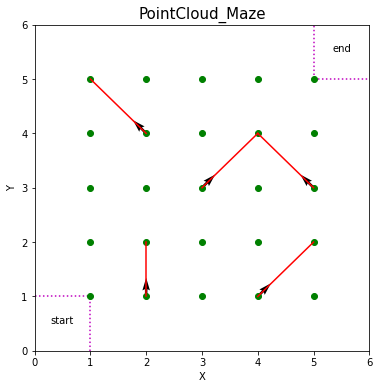

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
for d in range(1,6,1):
    x_plot = range(1,6,1)
    y_plot = [d]*5
    plt.plot(x_plot,y_plot,'o',color='g')

plt.text(0.5, 0.5, 'start', ha='center')    
plt.text(5.5, 5.5, 'end', ha='center')    

plt.xlim(0,6)
plt.ylim(0,6)
plt.title('PointCloud_Maze',fontsize=15)
plt.xlabel('X',fontsize=10)
plt.ylabel('Y',fontsize=10)
plt.hlines(1,0,1, "m",linestyle=":")
plt.vlines(1,0,1, "m", linestyle=":")
plt.hlines(5,5,6, "m",linestyle=":")
plt.vlines(5,5,6, "m", linestyle=":")

plt.quiver(3, 3, 4, 4)
plt.quiver(2, 1, 0, 1)
plt.quiver(2, 4, -1, 1)
plt.quiver(5, 3, -1, 1)
plt.quiver(4, 1, 1, 1)


plt.plot([3, 4], [3, 4],color="red")
plt.plot([4, 5], [4, 3],color="red")
plt.plot([2, 2], [2, 1],color="red")
plt.plot([4, 5], [1, 2],color="red")
plt.plot([2, 1], [4, 5],color="red")

line, = ax.plot([0,0], [0,0], color="green")

In [2]:
# 上，下，左，右，左上，右上，左下，右下の順に迷路の移動可否を表す
maze_0 = np.array([
                    [1, np.nan, np.nan, 1, np.nan, 1, np.nan, np.nan],  # snp.nan
                    [1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],  # s1
                    [1, np.nan, 1, 1, 1, 1, np.nan, np.nan],  # s2
                    [np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan],  # s3
                    [1, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan],  # s4
                    [1, 1, np.nan, 1, np.nan, 1, np.nan, 1],  # s5
                    [1, np.nan, 1, 1, 1, 1, 1, 1],  # s6
                    [1, 1, 1, 1, 1, 1, 1, 1],  # s7
                    [1, 1, 1, 1, 1, 1, 1, np.nan],  # s8
                    [1, 1, 1, np.nan, 1, np.nan, np.nan, np.nan],  # s9
                    [1, 1, np.nan, 1, np.nan, 1, np.nan, 1],  # s1np.nan
                    [1, 1, 1, 1, 1, 1, 1, 1],  # s11
                    [np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan],  # s12
                    [1, 1, 1, 1, np.nan, np.nan, 1, 1],  # s13
                    [np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, np.nan],  # s14
                    [1, 1, np.nan, 1, np.nan, np.nan, np.nan, 1],  # s15
                    [np.nan, np.nan, np.nan, np.nan, 1 ,np.nan, np.nan, np.nan],  # s16
                    [1, 1, 1, 1, 1, 1, 1, np.nan],  # s17
                    [1, 1, 1, 1, 1, 1, np.nan, np.nan],  # s18
                    [1, 1, 1, np.nan, 1, np.nan, np.nan, np.nan],  # s19
                    [np.nan, 1, np.nan, 1, np.nan, np.nan, np.nan, np.nan],  # s2np.nan?(1,5)
                    [np.nan, 1, 1, 1, np.nan ,np.nan, np.nan, 1],  # s21
                    [np.nan, 1, 1, 1, np.nan, np.nan, 1, 1],  # s22
                    [np.nan, 1, 1, 1, np.nan, np.nan, 1, 1],  # s23
#                   [np.nan, 1, np.nan, 1, 1, 1, 1, 1],  # s24

                    ])

#maze_0 = np.ones((25,8))


# # 上，下，左，右，左上，右上，左下，右下の順に移動の可否を表す
# map_0 = np.array([  [0, 0, 0, 0, 0, 0, 1],  # s20?(1,5)
#                     [0, 1, 1, 1, 0 ,0, 1, 1],  # s21
#                     [0, 1, 1, 1, 0, 0, 1, 1],  # s22
#                     [0, 1, 1, 1, 0, 0, 1, 1],  # s23
# #                   [0, 1, 0, 1, 1, 1, 1, 1],  # s24

# 					  [1, 1, 0, 1, 0, 0, 0, 1],  # s15
#                     [1, 1, 1, 1, 0 ,1, 1, 1],  # s16
#                     [1, 1, 1, 1, 1, 1, 1, 0],  # s17
#                     [0, 0, 0, 0, 0, 0, 1, 1],  # s18
#                     [1, 1, 1, 0, 1, 0, 0, 0],  # s19

#                     [1, 1, 0, 1, 0, 1, 0, 1],  # s10
#                     [1, 1, 1, 1, 1, 1, 1, 1],  # s11
#                     [0, 0, 0, 0, 0, 1, 0, 0],  # s12
#                     [1, 1, 1, 1, 0, 0, 1, 1],  # s13
#                     [0, 0, 0, 0, 1, 0, 0, 0],  # s14

#                     [1, 1, 0, 1, 0, 1, 0, 1],  # s5
#                     [0, 1, 0, 0, 0, 0, 0, 0],  # s6
#                     [1, 1, 1, 1, 1, 1, 1, 1],  # s7
#                     [1, 1, 1, 1, 1, 1, 1, 0],  # s8
#                     [0, 0, 0, 0, 0, 0, 1, 0],  # s9

#                     [1, 0, 0, 1, 0, 1, 0, 0],  # s0
#                     [1, 0, 0, 0, 0, 0, 0, 0],  # s1
#                     [1, 0, 1, 1, 1, 1, 0, 0],  # s2
#                     [0, 0, 0, 0, 0, 1, 0, 0],  # s3
#                     [1, 0, 1, 0, 0, 0, 0, 0],  # s4

#                     ])

In [3]:
# 迷路の移動可能分岐数を方策piに変換
def change_pi_a(maze):
    
    [m, n] = maze.shape
    pi = np.zeros((m, n))
#     print(pi)
    for i in range(0, m):
        pi[i, :] = maze[i, :] / np.nansum(maze[i, :])  # 移動可能確率算出
    pi = np.nan_to_num(pi)
#     print(pi)
    return pi

pi_0 = change_pi_a(maze_0)


In [4]:
# 初期行動価値設定
[i, j] = maze_0.shape
Q = np.random.rand(i, j) * maze_0
# print(Q)

In [5]:
# 状態遷移関数定義

Eps = 0.1  # ε-greedy法の初期確率

# 行動決定
def gen_line(s, Q, Eps, pi_0):
    vector = ["top", "bottom", "left", "right", "upper left", "upper right" ,"lower left" ,"lower right"]

    if np.random.rand() < Eps:
        # Epsilon-Greedy法によるランダムな行動決定
        gen_vector = np.random.choice(vector, p=pi_0[s, :])
    else:
        # Q最大値の方向を移動選択
        gen_vector = vector[np.nanargmax(Q[s, :])]
        
    if gen_vector == "top":
        act = 0
    elif gen_vector == "bottom":
        act = 1
    elif gen_vector == "left":
        act = 2
    elif gen_vector == "right":
        act = 3
    elif gen_vector == "upper left":
        act = 4
    elif gen_vector == "upper right":
        act = 5
    elif gen_vector == "lower left":
        act = 6
    elif gen_vector == "lower right":
        act = 7
    return act

# 状態遷移定義
def gen_s(s, a, Q, Eps, pi_0):
    vector = ["top", "bottom", "left", "right", "upper left", "upper right" ,"lower left" ,"lower right"]
    gen_vector = vector[a]
   
    if gen_vector == "top":
        s_proc = s + 5  
    elif gen_vector == "bottom":
        s_proc = s - 5 
    elif gen_vector == "left":
        s_proc = s - 1  
    elif gen_vector == "right":
        s_proc = s + 1  
    elif gen_vector == "upper left":
        s_proc = s + 4 
    elif gen_vector == "upper right":
        s_proc = s + 6  
    elif gen_vector == "lower left":
        s_proc = s - 6 
    elif gen_vector == "lower right":
        s_proc = s - 4 
    return s_proc


# 20 21 22 23 24 
# 15 16 17 18 19 
# 10 11 12 13 14 
# 5  6  7  8  9 
# 0  1  2  3  4  

In [6]:
# Q学習の際の定義

alp = 0.7 # 過去の値をどれくらい引き継ぐか
gamma = 0.9 # ステップ数を経たQ値を優先させる為

def Q_def(s, a, reward, s_proc, Q, alp, gamma):

    if s_proc == 24:
        Q[s, a] = Q[s, a] + alp * (reward - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + alp * (reward + gamma * np.nanmax(Q[s_proc,: ]) - Q[s, a])

    return Q

In [7]:
# 行動，状態を更新して迷路を解く関数

def gen_navi(Q, Eps, alp, gamma, pi):
    
    s = 0
    a = a_proc = gen_line(s, Q, Eps, pi)
    navi_l = [[0, np.nan]] # 更新したs,aを格納するリスト

    while (1):
        a = a_proc
        navi_l[-1][1] = a
        s_proc = gen_s(s, a, Q, Eps, pi)
        navi_l.append([s_proc, np.nan])

        # 報酬の定義とそれによる移動選択の更新
        if s_proc == 24:
            reward = 1
            a_proc = np.nan
#         elif s_proc == 6: # 報酬追加
#             reward = 0.1
#             a_proc = gen_line(s_proc, Q, Eps, pi)
        else:
            reward = 0
            a_proc = gen_line(s_proc, Q, Eps, pi)

        # Q値を更新
        Q = Q_def(s, a, reward, s_proc, Q, alp, gamma)

        # end識別
        if s_proc == 24:
            break
        else:
            s = s_proc

    return [navi_l, Q]


In [8]:
# Q学習の実行と状態価値関数導出

v = np.nanmax(Q, axis=1)  # 状態毎のQの最大値を抽出
judge = 1
learning = 1

v_l = []
v_l.append(np.nanmax(Q, axis=1))

while judge:
    print("試行回数:" + str(learning) + "回目")

    # ランダムな移動選択率を少しずつ小さくする
    Eps /= 2
#     alp -= 0.02 #学習率更新

    # Q学習により移動した履歴と，更新したQを求める
    [navi_l, Q] = gen_navi(Q, Eps, alp, gamma, pi_0)

    # 状態毎のQの最大値を抽出して更新
    v_n = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(v_n - v)))  # 期待報酬値の確認
    v = v_n
    v_l.append(v)

    print(str(len(navi_l) - 1) + "ステップで終了します．")

    # 学習回数
    learning += 1
    if learning > 100:
        break


試行回数:1回目
3.657039963654357
140ステップで終了します．
試行回数:2回目
0.49791915276076826
7ステップで終了します．
試行回数:3回目
0.49310982108693235
18ステップで終了します．
試行回数:4回目
0.24438826804233982
7ステップで終了します．
試行回数:5回目
0.16175029188503542
5ステップで終了します．
試行回数:6回目
0.13076891927344036
7ステップで終了します．
試行回数:7回目
0.12502420904548933
5ステップで終了します．
試行回数:8回目
0.0789963103623762
5ステップで終了します．
試行回数:9回目
0.04487084407258346
5ステップで終了します．
試行回数:10回目
0.02333291344241617
5ステップで終了します．
試行回数:11回目
0.01132178943466755
5ステップで終了します．
試行回数:12回目
0.0052026482117285555
5ステップで終了します．
試行回数:13回目
0.0022889403050851964
5ステップで終了します．
試行回数:14回目
0.0009719633711109399
5ステップで終了します．
試行回数:15回目
0.00040078030681756083
5ステップで終了します．
試行回数:16回目
0.00016122200435053635
5ステップで終了します．
試行回数:17回目
6.350119338860427e-05
5ステップで終了します．
試行回数:18回目
2.456027741948308e-05
5ステップで終了します．
試行回数:19回目
9.349551819859414e-06
5ステップで終了します．
試行回数:20回目
3.509805236556751e-06
5ステップで終了します．
試行回数:21回目
1.3013572586206834e-06
5ステップで終了します．
試行回数:22回目
4.772068307179467e-07
5ステップで終了します．
試行回数:23回目
1.7326075263390806e-07
5ステップ

In [9]:
# 結果のシミュレーション
from matplotlib import animation
from IPython.display import HTML

def simulation(i):

    state = navi_l[i][0]
    x = (state % 5) + 1 #+-1毎に水平移動，5を超えた時リセット
    y = int(state / 5) + 1 #+-5毎に垂直移動

    state_p = navi_l[i-1][0]
    x_p = (state_p % 5) + 1
    y_p = int(state_p / 5) + 1
    
    print("plot_step"+str(i), state,x_p,y_p,x,y)
#     print(navi_l)

    if i == 0:
        line, = ax.plot([1,1], [1,1])
    else:
        line, = ax.plot([x_p,x], [y_p,y])
        
    return (line,)

sim = animation.FuncAnimation(fig, simulation, frames=len(navi_l))

HTML(sim.to_jshtml())

plot_step0 0 5 5 1 1
plot_step0 0 5 5 1 1
plot_step1 5 1 1 1 2
plot_step2 11 1 2 2 3
plot_step3 17 2 3 3 4
plot_step4 23 3 4 4 5
plot_step5 24 4 5 5 5
